# Module 1: Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Learn when and how simulated data is appropriate for statistical analysis.
2. Experiment with the processes involved in simulating linear data.
3. Observe how the variance of data effects the best-fit line, even for the same underlying population.
4. Recognize the effects of standardizing predictors.
5. Interpreting the coefficients of linear models on both original and standardized data scales.


General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

**A Quick Note On Peer-Reviewed Assignments**

Welcome to your first peer reviewed assignment! These assignments will be a more open form than the auto-graded assignments, and will focus on interpretation and visualization rather than "do you get the right numbers?" These assignments will be graded by your fellow students (except in the specific cases where the work needs to be graded by a proctor) so please make your answers as clear and concise as possible.

In [1]:
# This cell loads the necesary libraries for this assignment
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Problem 1: Simulating Data

We're going to let you in on a secret. The turtle data from the autograded assignment was simulated...fake data! Gasp! Importantly, simulating data, and applying statistical models to simulated data, are very important tools in data science.

Why do we use simulated data? Real data can be messy, noisy, and we almost never *really* know the underlying process that generated real data. Working with real data is always our ultimate end goal, so we will try to use as many real datasets in this course as possible. However, applying models to simulated data can be very instructive: such applications help us understand how models work in ideal settings, how robust they are to changes in modeling assumptions, and a whole host of other contexts.

And in this problem, you are going to learn how to simulate your own data.

#### 1. (a) A Simple Line

Starting out, generate $10$ to $20$ data points for values along the x-axis. Then generate data points along the y-axis using the equation $y_i=\beta_0 + \beta_1x_i$. Make it a straight line, nothing fancy.

Plot your data (using ggplot!) with your $\mathbf{x}$ data along the x-axis and your $\mathbf{y}$ data along the y-axis.

In the *Markdown* cell below the `R` cell, describe what you see in the plot.

**Tip**: You can generate your x-data *deterministically*, e.g., using either `a:b` syntax or the `seq()` function, or *randomly* using something like `runif()` or `rnorm()`. In practice, it won't matter all that much which one you choose.

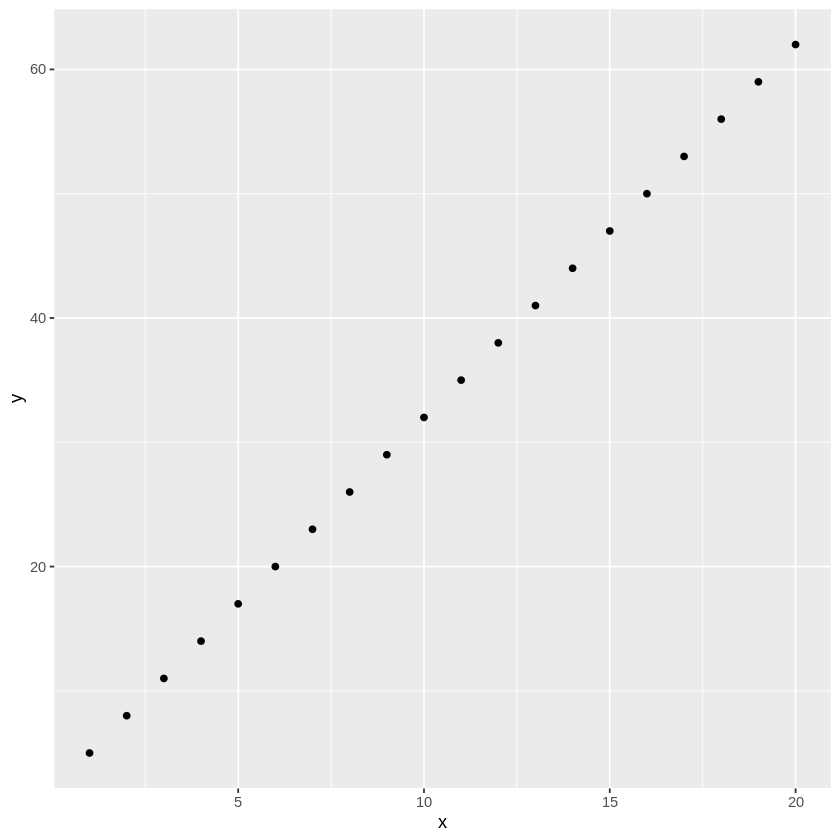

In [2]:
# Your Code Here
x.data = seq(0:19)
y.data = 2+3*x.data
df.data = data.frame(x=x.data,y=y.data)

g.data = ggplot(df.data,aes(x=x,y=y)) + geom_point()
g.data

The 20 sequential points of x data were generated using the seq() function. Corresponding y data was generated such that $\beta_0 = 2$ and $\beta_1 = 3$ for the equation $y_i = \beta_{0}+\beta_{1}x_i$. The resulting plot shows a linear relationship in the data along the generated line. The generated data points are spaced as we would expect.


#### 1. (b) The Error Component

That is a perfect set of data points, but that is a problem in itself. In almost any real life situation, when we measure data, there will be some error in those measurements. Recall that our simple linear model is of the form:

$$ y_i = \beta_0 + \beta_1x_i + \epsilon_i,  \qquad \epsilon_i \sim N(0, \sigma^2) $$

Add an error term to your y-data following the formula above. Plot at least three different plots (using ggplot!) with the different values of $\sigma^2$. 

How does the value of $\sigma^2$ affect the final data points? Type your answer in the *Markdown* cell below the `R` cell.

**Tip**: To randomly sample from a normal distribution, check out the `rnorm()` function.

[1] 0.1

[1] 5

[1] 25

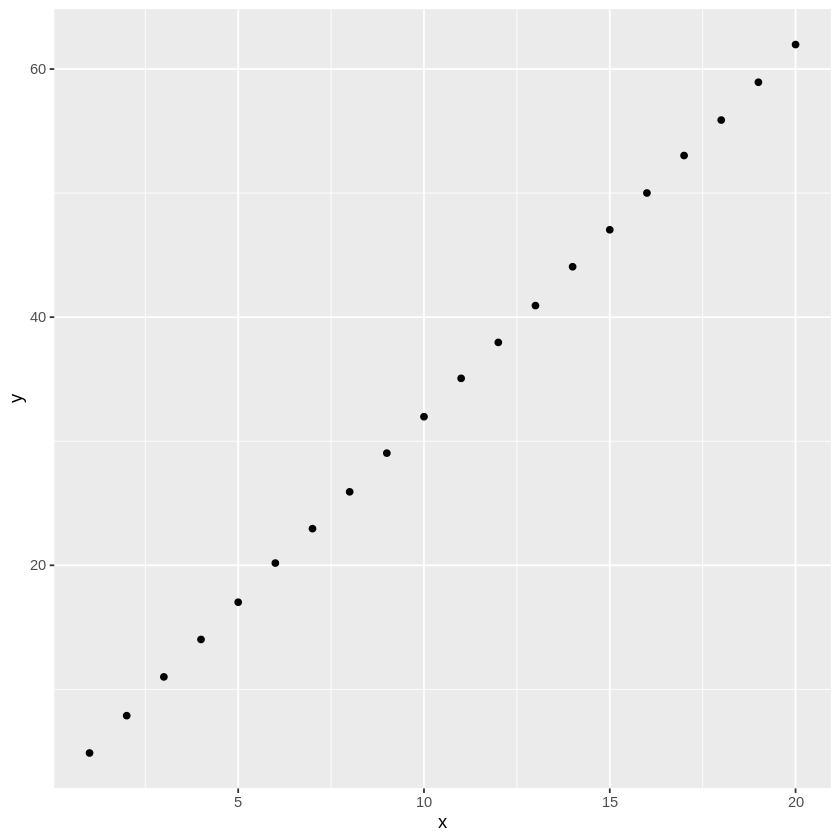

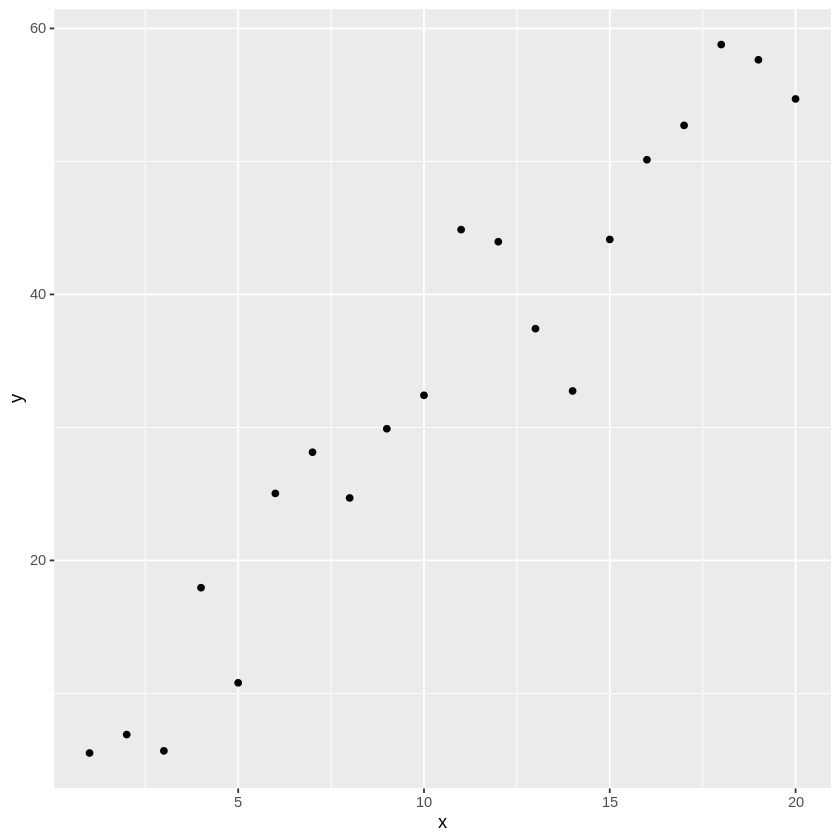

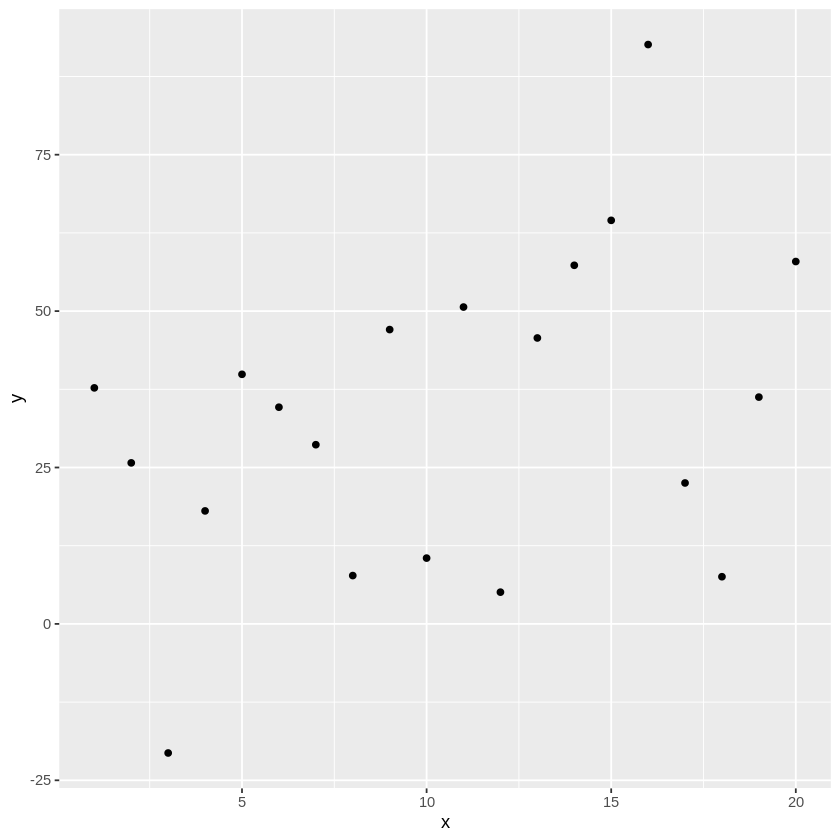

In [3]:
# Your Code Here
sd1 = 0.1
sd1
sd2 = 5
sd2
sd3 = 25
sd3

eps1 = rnorm(20,mean=0,sd=sd1)
eps2 = rnorm(20,mean=0,sd=sd2)
eps3 = rnorm(20,mean=0,sd=sd3)

df.data1 = data.frame(x=x.data,y=y.data+eps1)
df.data2 = data.frame(x=x.data,y=y.data+eps2)
df.data3 = data.frame(x=x.data,y=y.data+eps3)

g1.data = ggplot(df.data1,aes(x=x,y=y)) + geom_point()
g1.data

g2.data = ggplot(df.data2,aes(x=x,y=y)) + geom_point()
g2.data

g3.data = ggplot(df.data3,aes(x=x,y=y)) + geom_point()
g3.data

Changing the value of $\sigma^2$ in the distribution from which $\epsilon$ is selected changes the tightness of the points on the scatter plot. Some figures show a closer correlation and tight fit about the line while others show more random data. Smaller values of $\sigma^2$ mean a tighter fit about the line. Larger values for $\sigma^2$ means a looser fit, or more random data. In other words, if $\epsilon$ can be chosen from a set with larger variation, then the error can vary more greatly across data points.

# Problem 2: The Effects of Variance on Linear Models

Once you've completed **Problem 1**, you should have three different "datasets" from the same underlying data function but with different variances. Let's see how those variance affect a best fit line.

Use the `lm()` function to fit a best-fit line to each of those three datasets. Add that best fit line to each of the plots and report the slopes of each of these lines.

Do the slopes of the best-fit lines change as $\sigma^2$ changes? Type your answer in the *Markdown* cell below the `R` cell.

**Tip**: The `lm()` function requires the syntax `lm(y~x)`.

In [4]:
# Your Code Here
m1 = lm(y~x,df.data1)
m2 = lm(y~x,df.data2)
m3 = lm(y~x,df.data3)

m1
m2
m3


Call:
lm(formula = y ~ x, data = df.data1)

Coefficients:
(Intercept)            x  
      1.984        3.001  



Call:
lm(formula = y ~ x, data = df.data2)

Coefficients:
(Intercept)            x  
      3.207        2.857  



Call:
lm(formula = y ~ x, data = df.data3)

Coefficients:
(Intercept)            x  
     16.131        1.652  


The slopes of the lines of best fit change slightly with $\sigma^2$. They follow the original model with slight variation in the slopes according the the error in the model. It is unverified whether the change correlates with $\sigma^2$.

# Problem 3: Interpreting the Linear Model

Choose one of the above three models and write out the actual equation of that model. Then in words, in the *Markdown* cell below the `R` cell, describe how a $1$ unit increase in your predictor affects your response. Does this relationship make sense?

In [8]:
# Your Code Here
x = 0:5
y = 16.131 + 1.652*x #choose model m3 from above
y

[1] 16.131 17.783 19.435 21.087 22.739 24.391

The equation is $y = 4.805 + 2.501x$. Increasing the predictor variable by one results in an increase in the response variable according to the linear model. It makes sense as a relationship between variables on a linear model.


# Problem 4: The Effects of Standardizing Data

We spent some time standardizing data in the autograded assignment. Let's do that again with your simulated data. 

Using the same model from **Problem 3**, standardize your simulated predictor. Then, using the `lm()` function, fit a best fit line to the standardized data. Using ggplot, create a scatter plot of the standardized data and add the best fit line to that figure.


Call:
lm(formula = y ~ x, data = df.data3.standard)

Coefficients:
(Intercept)            x  
  9.208e-17    3.831e-01  


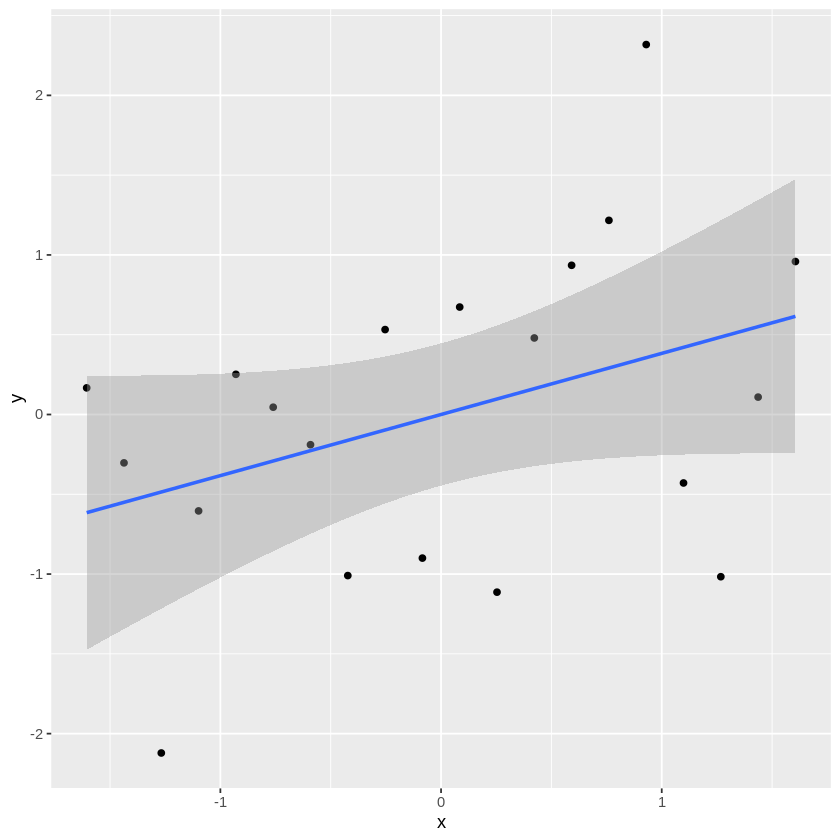

In [9]:
# Your Code Here
x.standard = (df.data3$x-mean(df.data3$x))/sd(df.data3$x)
y.standard = (df.data3$y-mean(df.data3$y))/sd(df.data3$y)
df.data3.standard = data.frame(x=x.standard,y=y.standard)



m3.standard = lm(y~x,df.data3.standard)
m3.standard

g3.data.standard = ggplot(df.data3.standard,aes(x=x,y=y)) + geom_point() + geom_smooth(method="lm", formula = "y~x")
g3.data.standard


The figure above depicts a scatterplot of the standardized data overlayed with a line of best fit and its confidence interval. 

# Problem 5: Interpreting the Standardized Model

Write out the expression for your standardized model. In words, in the *Markdown* cell below the `R` cell, describe how a $1$ unit increase in your standardized predictor affects the response. Is this value different from the original model? If yes, then what can you conclude about interpretation of standardized predictors vs. unstandardized predictors.

In [10]:
# Your Code Here
x = 0:5
y = 9.208e-17 + 3.831e-01 *x
y    

[1] 9.2080e-17 3.8310e-01 7.6620e-01 1.1493e+00 1.5324e+00 1.9155e+00

The equation is $y = -7.797e-17 + 6.556e-01(x)$. Increasing the predictor variable by one results in an increase in the response variable according to the linear model. It makes sense as a relationship between variables on a linear model. The amount of change is different from the previous interpretation of the non-standardized model. In fact, the difference between the standardized data is consistent, which it is not consistent in the raw data. We can conclude standardized predictors are better for predictions because they have the benefit of being standard and consistent.